In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

import shapefile as sf
from pyproj import Proj
from censusgeocode import CensusGeocode

import datetime
import random

%matplotlib inline

In [2]:
sl_reader = sf.Reader('shapefiles/Trees_SD/Trees_SD.shp')
sl_record = pd.DataFrame(sl_reader.records())
sl_shapes = sl_reader.shapes()

In [4]:
# Need to convert each Street Light location to latitude and longitude
sl_record['lon'] = None
sl_record['lat'] = None

In [7]:
p1 = Proj("+init=EPSG:2230", preserve_units=True)
print len(sl_record)
for i in range(0,len(sl_record)): 
    lon, lat = p1(sl_shapes[i].points[0][0], sl_shapes[i].points[0][1],inverse=True)
    sl_record.loc[i, 'lon'] = lon 
    sl_record.loc[i, 'lat'] = lat
    if (i % 1000==0):
        print i, i, i 

212304
0 0 0
1000 1000 1000
2000 2000 2000
3000 3000 3000
4000 4000 4000
5000 5000 5000
6000 6000 6000
7000 7000 7000
8000 8000 8000
9000 9000 9000
10000 10000 10000
11000 11000 11000
12000 12000 12000
13000 13000 13000
14000 14000 14000
15000 15000 15000
16000 16000 16000
17000 17000 17000
18000 18000 18000
19000 19000 19000
20000 20000 20000
21000 21000 21000
22000 22000 22000
23000 23000 23000
24000 24000 24000
25000 25000 25000
26000 26000 26000
27000 27000 27000
28000 28000 28000
29000 29000 29000
30000 30000 30000
31000 31000 31000
32000 32000 32000
33000 33000 33000
34000 34000 34000
35000 35000 35000
36000 36000 36000
37000 37000 37000
38000 38000 38000
39000 39000 39000
40000 40000 40000
41000 41000 41000
42000 42000 42000
43000 43000 43000
44000 44000 44000
45000 45000 45000
46000 46000 46000
47000 47000 47000
48000 48000 48000
49000 49000 49000
50000 50000 50000
51000 51000 51000
52000 52000 52000
53000 53000 53000
54000 54000 54000
55000 55000 55000
56000 56000 56000
57000 

In [8]:
#sl_record.to_csv('output_files/tree_latlon.csv', index=False)

In [2]:
sl_record = pd.read_csv('output_files/tree_records_prelim.csv')

Associate each street light with its associated block group and census tract.

In [3]:
cg = CensusGeocode()

In [5]:
temp = np.where(np.isnan(sl_record['block'])==True)[0]
temp[np.where(temp>195990)[0]]

array([196001, 196002, 196003, ..., 212301, 212302, 212303])

In [10]:
#sl_record.loc[i, 'block'] = None
#sl_record.loc[i, 'tract'] = None
#sl_record.loc[i, 'geoid'] = None
#sl_record.loc[i, 'blockgroup'] = None

In [6]:
start = datetime.datetime.now()

print len(sl_record)

for i in range(196000, len(sl_record)): 
    if ((sl_record.loc[i,'lon']!=0.0) 
        & (np.isnan(sl_record.loc[i,'lon'])==False)) :
        n_attempts = 0
        while True: 
            try: 
                n_attempts += 1
                temp1 = cg.coordinates(x=sl_record.loc[i,'lon'], y=sl_record.loc[i, 'lat']) 
                break 
            except: 
                if n_attempts>=5: 
                    print 'bad in try1 ' + i + ' ' + i
                    break 

        if (len(temp1[0]['2010 Census Blocks'])>0):
            if ('status' not in temp1[0]['2010 Census Blocks'][0].keys()[0]): 
                temp = temp1[0]['2010 Census Blocks'][0]
                if (temp is not None):
                    sl_record.loc[i, 'block'] = temp['BLOCK']
                    sl_record.loc[i, 'tract'] = temp['TRACT']
                    sl_record.loc[i, 'geoid'] = temp['GEOID']
                    sl_record.loc[i, 'blockgroup'] = temp['BLKGRP']

                if (i % 500 == 0): 
                    finish = datetime.datetime.now()
                    print i, 'Time Diff: ', finish-start, 'Finish Time: ', finish
                    start = datetime.datetime.now()

                if (i % 250 == 0): 
                    sl_record.to_csv('output_files/tree_records_prelim.csv', index=False)

212304
196000 Time Diff:  0:00:02.777757 Finish Time:  2016-09-23 00:30:06.589853
196500 Time Diff:  0:09:55.551513 Finish Time:  2016-09-23 00:40:02.141595
197000 Time Diff:  0:10:20.984046 Finish Time:  2016-09-23 00:50:23.126057
197500 Time Diff:  0:09:42.101438 Finish Time:  2016-09-23 01:00:05.227722
198000 Time Diff:  0:10:00.683636 Finish Time:  2016-09-23 01:10:05.911565
198500 Time Diff:  0:09:57.761249 Finish Time:  2016-09-23 01:20:03.673025
199000 Time Diff:  0:09:56.211225 Finish Time:  2016-09-23 01:29:59.884461
199500 Time Diff:  0:09:41.685271 Finish Time:  2016-09-23 01:39:41.569938
200000 Time Diff:  0:10:24.059957 Finish Time:  2016-09-23 01:50:05.630166
200500 Time Diff:  0:12:10.722595 Finish Time:  2016-09-23 02:02:16.352980
201000 Time Diff:  0:09:34.912292 Finish Time:  2016-09-23 02:11:51.265628
201500 Time Diff:  0:09:31.777058 Finish Time:  2016-09-23 02:21:23.042901
202000 Time Diff:  0:09:53.959543 Finish Time:  2016-09-23 02:31:17.002652
202500 Time Diff: 

In [14]:
print i

9156


In [8]:
#sl_record.to_csv('output_files/tree_records_prelim.csv', index=False)

### Above section takes a long time to process. We only want to do it once! The output is saved in and we use it below:

In [21]:
tree_individual = pd.read_csv('output_files/tree_records_all.csv')

### Calculate tree density

In [30]:
# Blockgroup shape file
reader2 = sf.Reader('shapefiles/sandiego_city_blockgroups.shp')
bg_info2 = pd.DataFrame(reader2.records())
shapes2 = reader2.shapes()


In [39]:
bg_info2.rename(columns={2: 'tract', 3: 'blockgroup', 8: 'land_area'}, inplace=True)
bg_info2['tract'] = bg_info2['tract'].astype(float)
bg_info2['blockgroup'] = bg_info2['blockgroup'].astype(float)

In [40]:
tree_individual['tree_count'] = 1.0

tree_bg = tree_individual[['tract', 'blockgroup', 'tree_count']].groupby(['tract', 'blockgroup'], as_index=False).agg('count')

In [41]:
tree_merged = pd.merge(tree_bg, bg_info2[['tract', 'blockgroup', 'land_area']], on=['tract', 
                                                                                   'blockgroup'], 
                      how='left')

In [43]:
tree_merged['tree_density'] = tree_merged['tree_count'] / tree_merged['land_area']

In [45]:
#tree_merged.to_csv('output_files/tree_bg.csv', index=False)

(-117.31, -116.85)

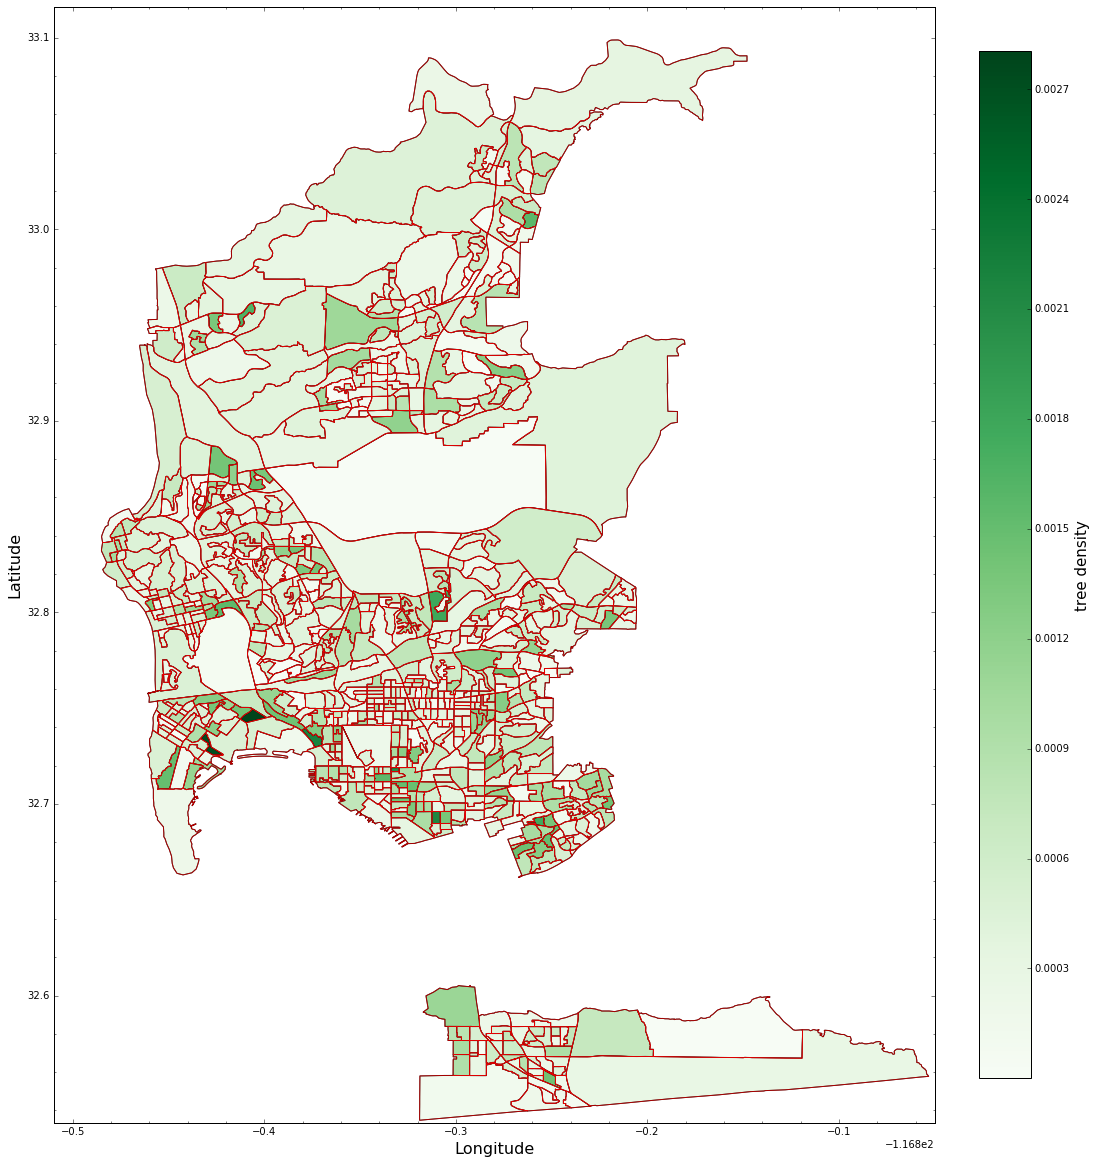

In [51]:
column_choice = 'tree_density'
#column_choice = 'Estimate; Total'

p1 = Proj("+init=EPSG:2230", preserve_units=True)

fig,ax = plt.subplots(1,1, figsize=(20,20))
patches = []
for i in range(0,len(bg_info2)): 
    barf = pd.DataFrame(shapes2[i].points)
    poly = plt.Polygon(barf[[0,1]], fc='none', ec='k', alpha=0.7, lw=1.0)
    patches.append(poly)
    #plt.gca().add_patch(poly)

colors = tree_merged[column_choice]

p = PatchCollection(patches, cmap='Greens', alpha=1.0)
p.set_array(np.array(colors))
#p.set_clim([min(colors),0.40])
p.set_clim([min(colors),max(colors)])

ax.add_collection(p)

patches1 = []
for i in range(0,len(bg_info2)): 
    #col_values.append(census_trimmed.loc[i, column_choice])
    barf = pd.DataFrame(shapes2[i].points)
    poly = plt.Polygon(barf[[0,1]], fc='none', ec='r', alpha=0.7, lw=0.9)
    patches1.append(poly)
    plt.gca().add_patch(poly)
    stringer = (bg_info2.loc[i,'tract'].astype(str) + '   ' 
                + bg_info2.loc[i,'blockgroup'].astype(str))
    #plt.annotate(stringer, xy=(float(bg_info2.loc[i,11]), float(bg_info2.loc[i,10])))

plt.axis('scaled')
plt.minorticks_on()

cbar = plt.colorbar(p, fraction=0.046, pad=0.04, shrink=1.0).set_label(label='tree density',
                                                                       size=15)

plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.ylim(32.533541,33.116178)
#plt.ylim(32.70,32.72)

plt.xlim(-117.31,-116.85)
#plt.xlim(-117.2,-117.1)


#plt.show()

#plt.savefig('output_figures/graffiti_per_map.png', bbox_inches='tight')
#mpld3.display()

